In [267]:
import os
import math

import numpy as np
import matplotlib.pyplot as plt
import PIL

PATH_DIR_DATA = "../data"
PATH_DATA = os.path.join(PATH_DIR_DATA, "external/malimg-dataset/malimg.npz")

In [290]:
def bits_to_picture(bits, picture_height, padding_value=0):
    """ Convert a numpy array of binary values to a graymap picture.
    The width of the picture is computed automaticaly with the `picture_height` parameter.
    Missing pixels are completed with the calue of `padding_value`.
    
    :param bits: The array of bits to convert.
    :param picture_height: The height of the output picture.
    :param padding_value: The value replacing missing pixels.
    """
    # Convert array of bits to array of ints
    bitmap = np.char.mod('%d', bits.reshape(-1, 8))
    bitmap = np.apply_along_axis(lambda b: int("".join(b), 2),
                                 axis=1, arr=bitmap).astype(np.uint8)

    # Convert bitmap vector to a matrix
    number_of_pixels = bitmap.shape[0]
    bitmap.resize(picture_height * math.ceil(bitmap.shape[0] / picture_height))
    bitmap[number_of_pixels:] = padding_value  # Add padding
    picture = bitmap.reshape(picture_height, math.ceil(bitmap.shape[0] / picture_height))
    return picture


def gray_to_rgb(picture):
    """ Convert a grayscale picture represented as a 2D numpy
    array to a RGB picture represented as a 3D numpy array.
    
    :param picture: The picture to convert.
    """
    return np.stack((picture, ) * 3, axis=-1)

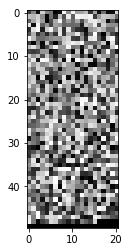

In [291]:
malware = np.random.choice([0, 1], size=(1, 1024 * 8))
picture = bits_to_picture(malware, 50)
plt.imshow(picture, cmap='gray')
plt.show()

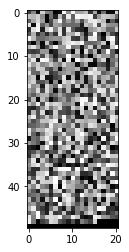

In [292]:
plt.imshow(gray_to_rgb(picture), cmap="summer")
plt.show()